# Data Visualization

Numbers are nice, but it's hard to see trends in a table of digits.

> Before you run, make sure you have installed matplotlib in the notebook kernel. You only need to do this once.
>
> `conda install -p .\.conda matplotlib`

In [2]:


import io
import pandas as pd
import requests

# Round values to 3 decimal places.
pd.set_option('display.float_format', '{:.3f}'.format)

In [4]:
url="https://files.zillowstatic.com/research/public_csvs/zhvi/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1699740944"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('utf-8')), encoding = "utf-8", index_col="RegionID")
df.head(2)

,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,...,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30
RegionID,,,,,,,,,,,,,,,,,,,,,
102001,0,United States,country,NaN,121428.348,121641.980,121906.914,122475.146,123129.114,123830.255,...,341524.687,340331.965,339460.291,339398.681,340364.872,341993.735,343935.027,345686.216,347311.245,348538.962
394913,1,"New York, NY",msa,NY,216218.985,217137.794,218065.112,219944.218,221890.098,224047.392,...,607957.914,607138.376,605781.039,606096.535,608105.121,612136.786,616308.017,619911.494,623211.985,625939.721


In [6]:
top10 = df.groupby('StateName')[df.columns[-1]].describe().sort_values(by='mean', ascending=False).head(10)
pd.DataFrame(top10)

,count,mean,std,min,25%,50%,75%,max
StateName,,,,,,,,
HI,4.000,846573.069,209775.812,547595.709,784518.195,907639.231,969694.105,1023418.106
MA,6.000,655387.412,423697.703,330513.897,375321.229,540659.317,689574.640,1461070.330
CA,34.000,594245.074,296048.577,232887.072,371551.825,478731.261,827769.439,1452953.524
CO,17.000,579980.341,294456.631,247119.893,330939.133,488766.176,731873.400,1233959.983
UT,9.000,501257.982,228528.396,247965.913,407439.404,480576.986,521252.611,1051647.918
MT,7.000,465991.852,155909.759,268173.209,348876.580,450424.701,582673.421,680245.054
WA,20.000,454441.916,104924.773,292343.520,391972.841,433832.556,514080.978,702227.364
RI,1.000,452490.898,NaN,452490.898,452490.898,452490.898,452490.898,452490.898
WY,9.000,451426.614,378236.407,269108.933,301164.225,311611.670,359926.335,1452155.247


# Candlesticks

The candlestick plot is designed to show exactly how much of the data lies around the middle 50%, and how much lies
beyond it. We create candlesticks by incorporating multiple elements into a single graph.

> `matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)`

1. First, we display the middle 50% between the 25 and 75 percentiles.

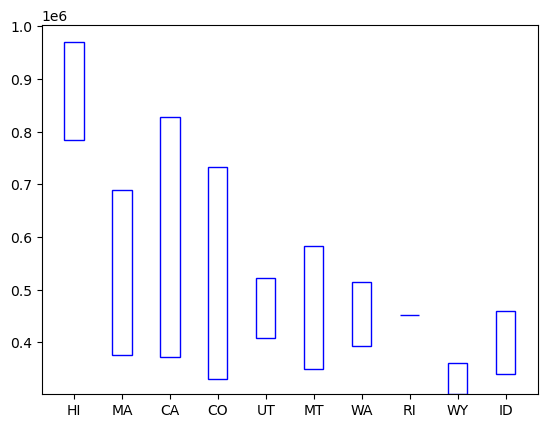

In [60]:
import matplotlib.pyplot as plt

width = .4
width2 = .04

plt.figure()
plt.bar(top10.index, top10['75%']-top10['25%'], width, bottom=top10['25%'], color='white', edgecolor='blue')
plt.show()

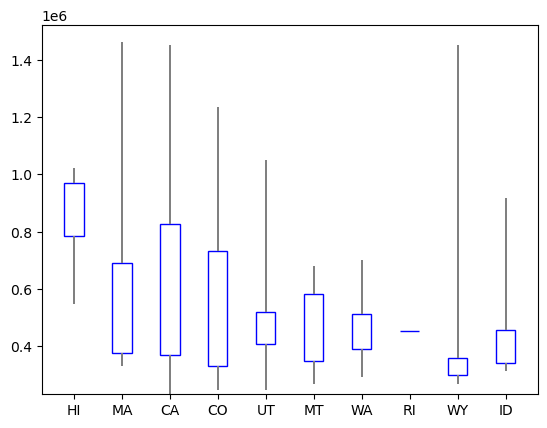

In [61]:
plt.figure()
plt.bar(top10.index, top10['75%']-top10['25%'], width, bottom=top10['25%'], color='white', edgecolor='blue')
plt.bar(top10.index, top10['max']-top10['75%'], width2, bottom=top10['75%'], color='gray')
plt.bar(top10.index, top10['25%']-top10['min'], width2, bottom=top10['min'], color='gray')
plt.show()

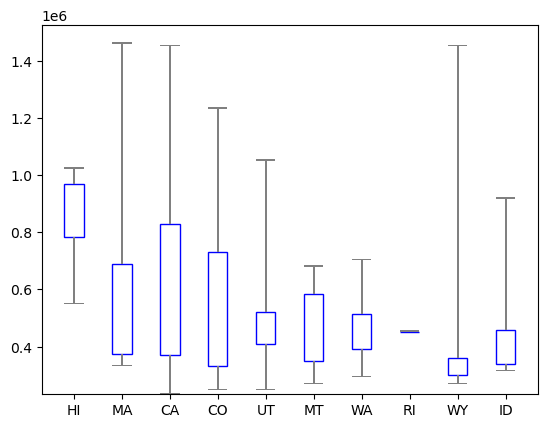

In [62]:
plt.figure()
plt.bar(top10.index, top10['75%']-top10['25%'], width, bottom=top10['25%'], color='white', edgecolor='blue')
plt.bar(top10.index, top10['max']-top10['75%'], width2, bottom=top10['75%'], color='gray')
plt.bar(top10.index, top10['25%']-top10['min'], width2, bottom=top10['min'], color='gray')
plt.bar(top10.index, 5000, width, bottom=top10['max'], color='gray')
plt.bar(top10.index, 5000, width, bottom=top10['min'], color='gray')
plt.show()

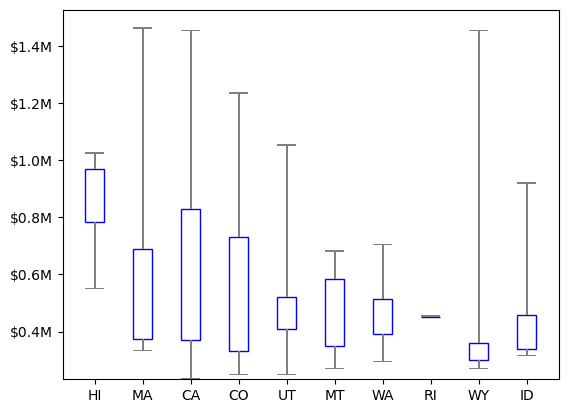

In [72]:
from matplotlib import ticker

plt.figure()
plt.bar(top10.index, top10['75%']-top10['25%'], width, bottom=top10['25%'], color='white', edgecolor='blue')
plt.bar(top10.index, top10['max']-top10['75%'], width2, bottom=top10['75%'], color='gray')
plt.bar(top10.index, top10['25%']-top10['min'], width2, bottom=top10['min'], color='gray')
plt.bar(top10.index, 5000, width, bottom=top10['max'], color='gray')
plt.bar(top10.index, 5000, width, bottom=top10['min'], color='gray')

plt.subplot().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_: f'${x/1e6}M'))
plt.show()

